In [2]:
%matplotlib inline
import cairo
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20, 10)

Sprawdź jak wygląda fraktal znany jako trójkąt Sierpińskiego. Gdy się chwilę zastanowić, widać że algorytm jego rysowania można wyrazić używając rekursji (w teorii: nieskończonej, w praktyce: do poziomu dobranego tak, aby rysunek miał zadowalającą dokładność). Zaimplementuj ten algorytm jako funkcję języka C void sierpinski(cairo_t * ctx, int level) albo jej pythonowy odpowiednik. Dla level równego zero procedura ma rysować zwykły trójkąt; dla level większego od zera ma trzy razy wywoływać samą siebie, przekazując wartość level-1 jako argument i wcześniej odpowiednio transformując układ współrzędnych.

![Trojkat sierpinskiego](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Sierpinski_triangle_evolution.svg/1920px-Sierpinski_triangle_evolution.svg.png)

In [3]:
def sierpinski(ctx, level = 0):
    if level == 0:
        ctx.set_source_rgb(0, 0, 0)
        ctx.move_to(0, 1000)
        ctx.line_to(500, 0)
        ctx.line_to(1000, 1000)
        ctx.close_path()
        ctx.fill()
        
    else:
        ctx.scale(1 / 2, 1 / 2)
        
        ctx.save()
        ctx.translate(500, 0)
        sierpinski(ctx, level - 1)
        ctx.restore()
        
        ctx.save()
        ctx.translate(0, 1000)
        sierpinski(ctx, level - 1)
        ctx.restore()
        
        ctx.save()
        ctx.translate(1000, 1000)
        sierpinski(ctx, level - 1)
        ctx.restore()

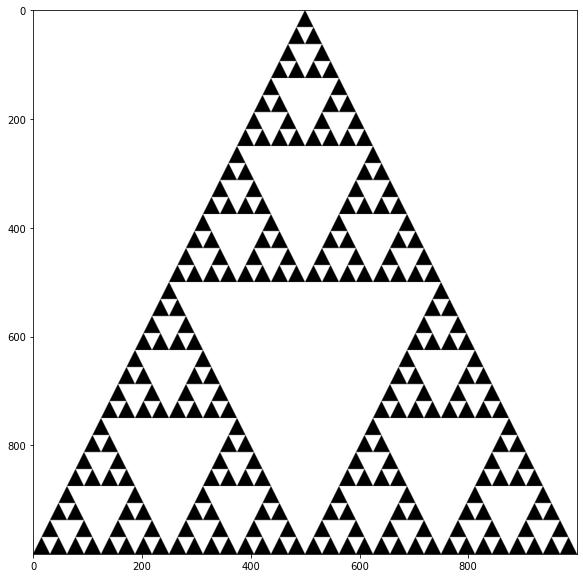

In [11]:
surf = cairo.SVGSurface("wynik.svg", 1000, 1000)
ctx = cairo.Context(surf)

ctx.save()
ctx.set_source_rgb(1, 1, 1)
ctx.paint()
ctx.restore()

sierpinski(ctx, 5)

surf.write_to_png("wynik.png")
img = cv2.imread("wynik.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))